In [1]:
import numpy as np

fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) #10000개 특성을 50개로 압축
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
pca.components_.shape

(50, 10000)

In [11]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

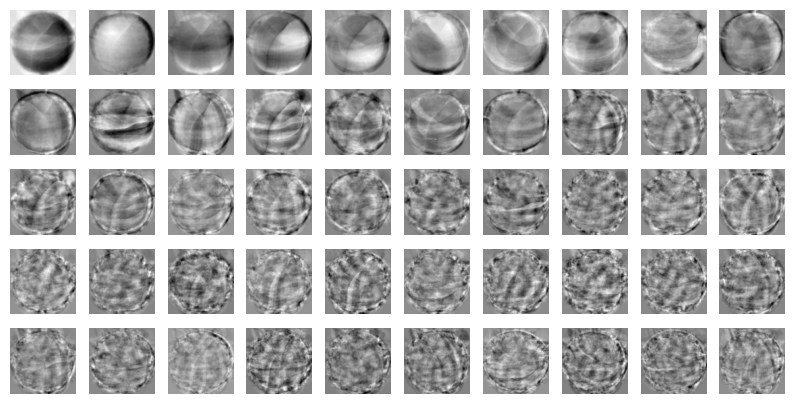

In [14]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [15]:
fruits_2d.shape

(300, 10000)

In [16]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape #데이터 50개로 압축

(300, 50)

In [17]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape #데이터 1000개로 다시 복원

(300, 10000)

In [18]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

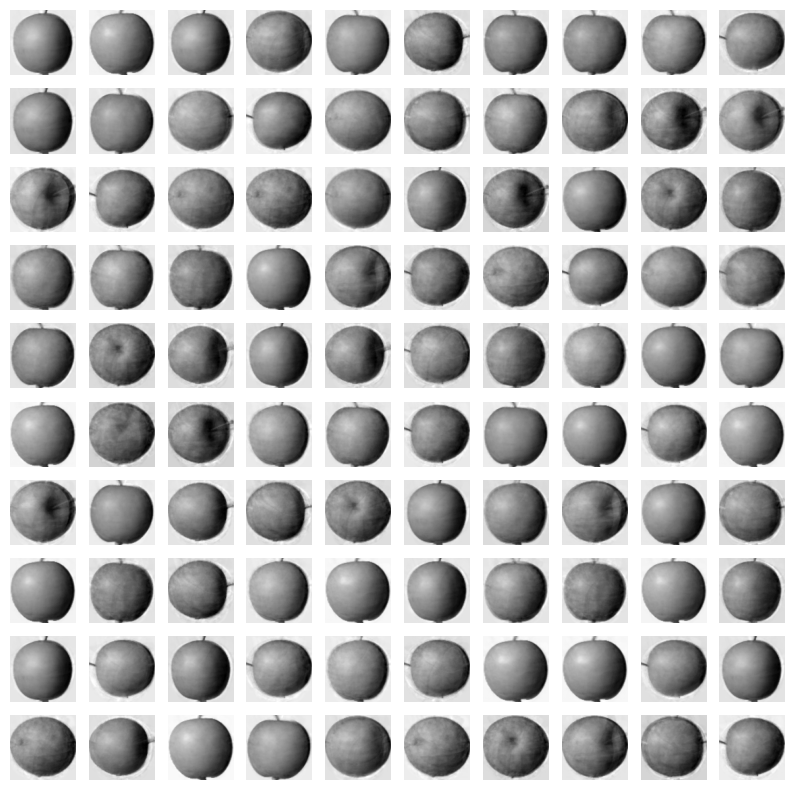

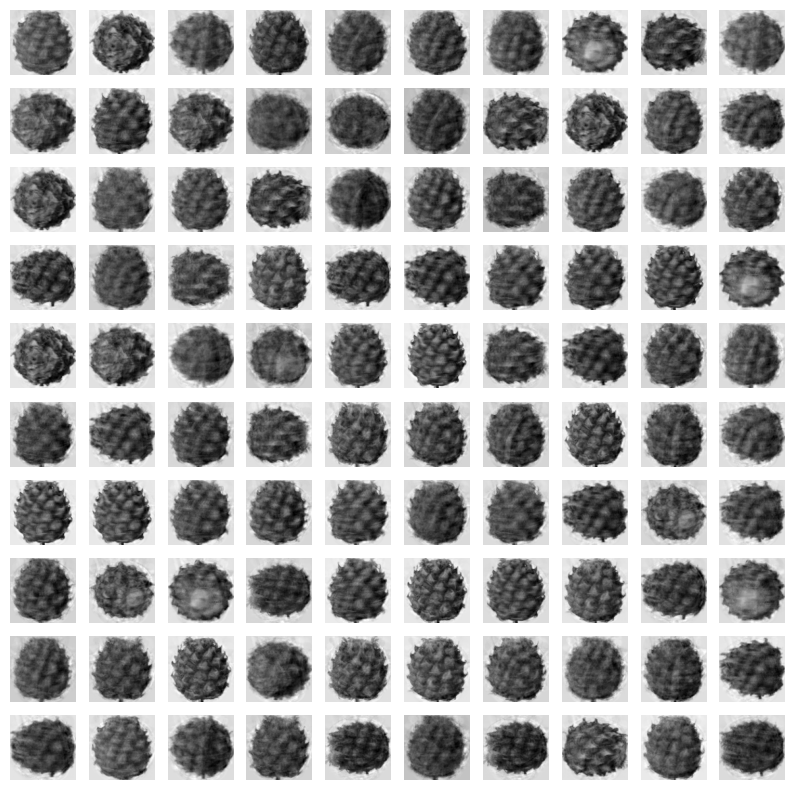

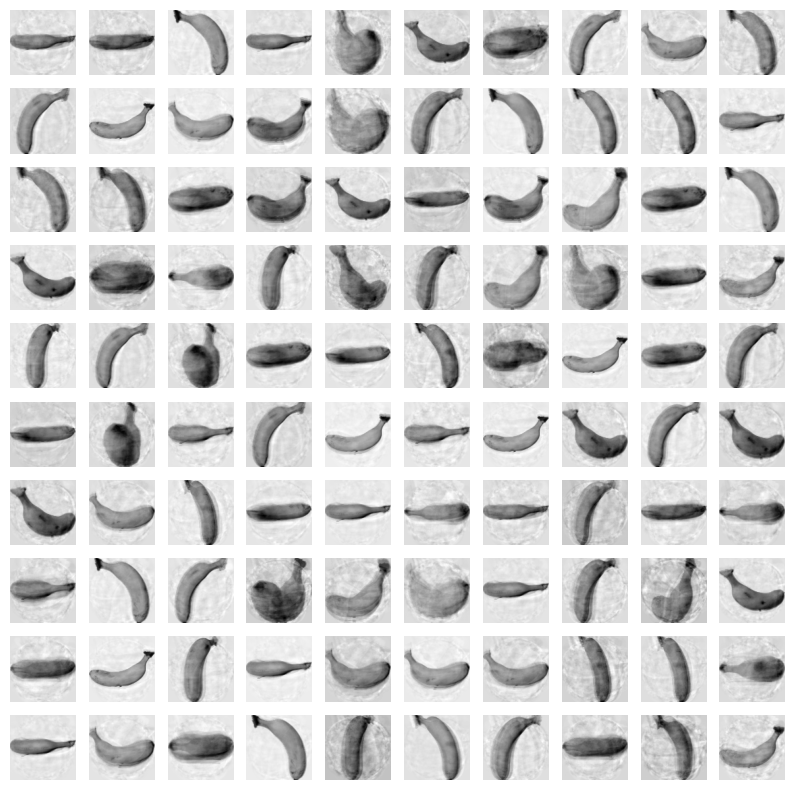

In [19]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

In [20]:
pca.explained_variance_ratio_ #압축된 주성분 50개 데이터 모두 보여줌

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511203, 0.00486383, 0.00480347,
       0.00447834, 0.00437317, 0.00408039, 0.00389468, 0.00372434,
       0.00359289, 0.00331453, 0.00317822, 0.00304341, 0.00303762,
       0.00288929, 0.00275823, 0.00264763, 0.00255582, 0.00252074,
       0.00247317, 0.00239383, 0.00230879, 0.00222285, 0.00216641,
       0.00213877, 0.00196508, 0.00192795, 0.00190231, 0.00185687,
       0.00182282, 0.00174122, 0.00168072, 0.00162178, 0.00159211])

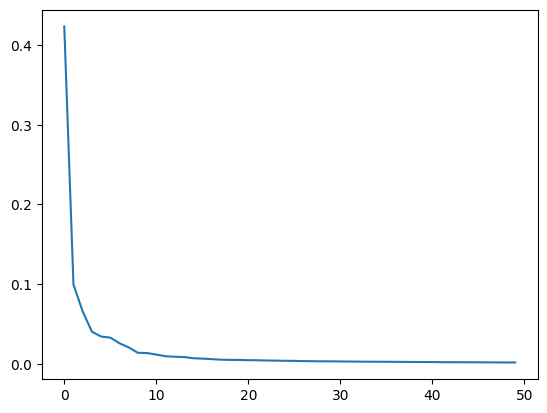

In [21]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()

In [24]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [25]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
scores #fit time 학습 속도

{'fit_time': array([0.1836803 , 0.11959839, 0.12370872, 0.11895728, 0.11959743]),
 'score_time': array([0.00099659, 0.00199246, 0.0019865 , 0.00199342, 0.00198627]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [26]:
scores = cross_validate(lr, fruits_pca, target)
scores

{'fit_time': array([0.00498223, 0.00598025, 0.00697851, 0.01694202, 0.00996208]),
 'score_time': array([0.0009973 , 0.00099754, 0.00101471, 0.00100136, 0.00099659]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [27]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [28]:
pca.n_components_ # 2개로 분산 50% 표현 가능

np.int64(2)

In [29]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [30]:
scores = cross_validate(lr, fruits_pca, target)
scores

C:\Users\2-10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\2-10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

{'fit_time': array([0.02938676, 0.00996852, 0.01196003, 0.00597978, 0.01195955]),
 'score_time': array([0.00073457, 0.        , 0.        , 0.00099683, 0.        ]),
 'test_score': array([0.96666667, 1.        , 1.        , 0.98333333, 1.        ])}

In [39]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

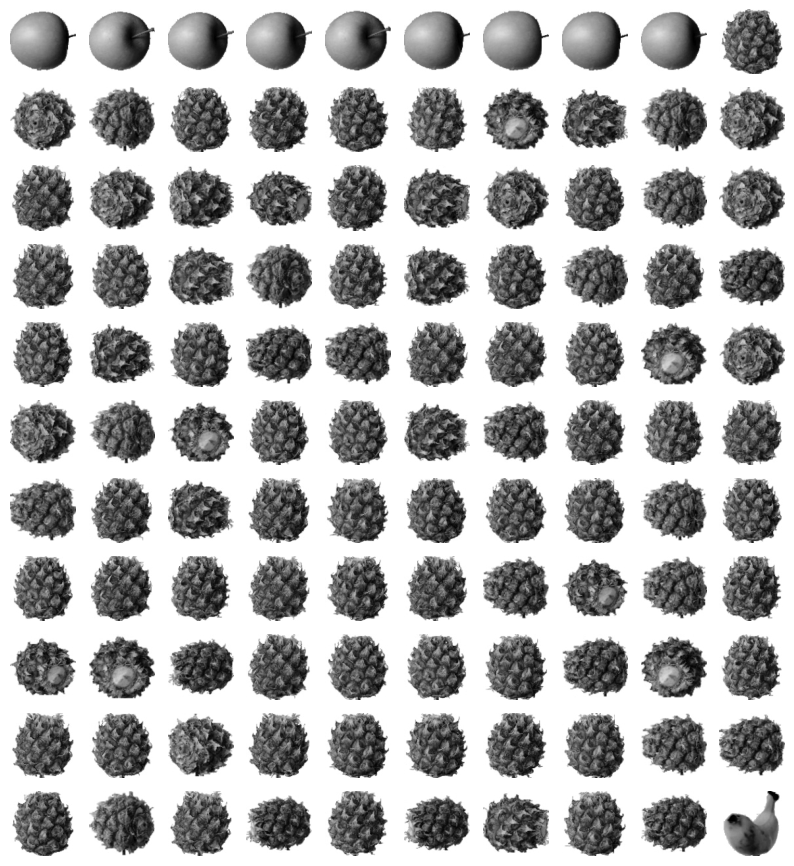

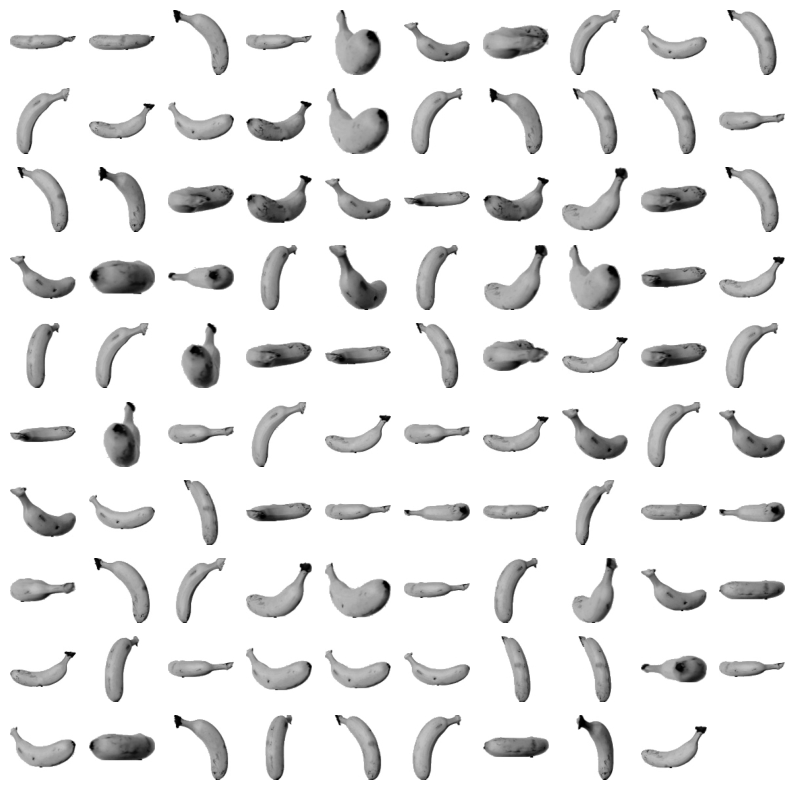

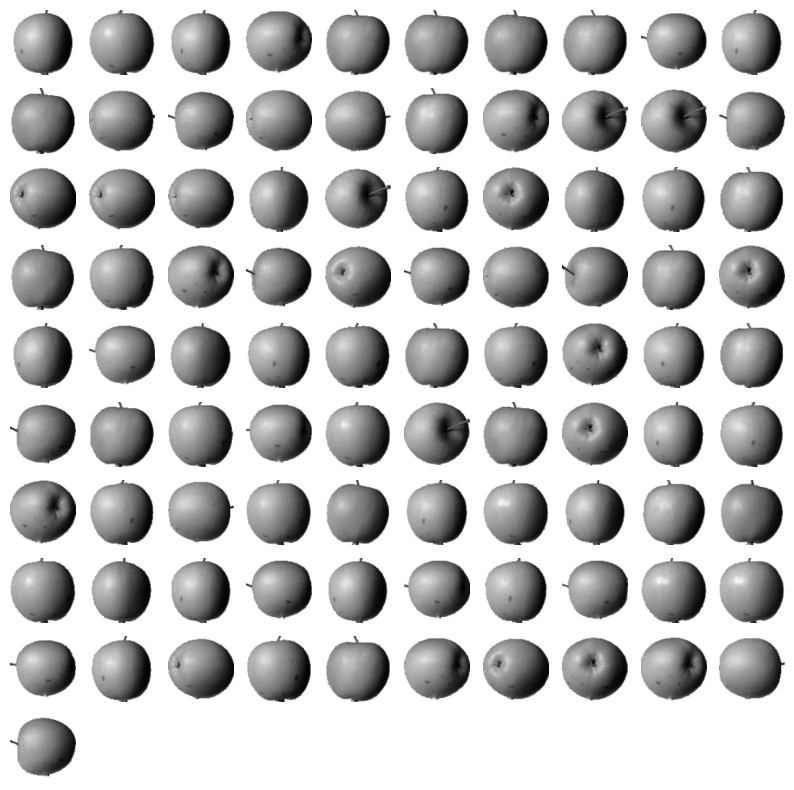

In [41]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print('\n')